<h1>OPEN CV</h1>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

<h1>READING IMAGE and SHOWING</h1>

In [ ]:
# READING IMAGE and SHOWING
img = cv.imread('./Images/flower.jpg')
cv.imshow('df', img)

cv.waitKey(0)

<h1>READING VIDEO and SHOWING</h1>

In [ ]:
# READING VIDEO and SHOWING
capture = cv.VideoCapture('./Videos/video.mp4')
while True:
    isTrue, frame = capture.read()
    cv.imshow('Video', frame)

    if cv.waitKey(0) and 0xFF==ord('q'):
        break

capture.release()
cv.destroyAllWindows()

<h1>DRAWING</h1>
    <li>Drawing Rectangle</li>
    <li>Drawing Circle </li>
    <li>Drawing line </li>


In [ ]:
# Drawing Rectangle
img_nature = cv.imread('./Images/nature.jpg')
print(img_nature.shape)
rect_ = cv.rectangle(img_nature, (50,50), (250,250), (255,255,255), thickness=3)
cv.imshow('RECTANGLE', rect_)

cv.waitKey(0)


In [ ]:
# Drawing Circle
circle = cv.circle(img_nature, (img_nature.shape[1]//2, img_nature.shape[0]//2), 100, (255,0,0), thickness=-1)
cv.imshow('CIRCLE', circle)

cv.waitKey(0)

In [ ]:
# Drawing line
line = cv.line(img_nature, (0,0), (img_nature.shape[1], img_nature.shape[0]), (0,0,0), thickness=3)
cv.imshow('LINE', line)

cv.waitKey(0)

<h1>BASICS</h1>
    <li>Converting BGR to another Channels</li>
    <li>Blur </li>
    <li>Edge Cascade </li>
    <li>Dilating</li>
    <li>Eroding --> opposite of Dilating</li>

In [3]:
# Converting BGR to another Channels
img_girl = cv.imread('./Images/girl.jpg')
cv.imshow('Girl', img_girl)

cv.waitKey(0)

-1

In [ ]:
# Converting BGR to another Channels
# BGR TO RGB
rgb = cv.cvtColor(img_girl, cv.COLOR_BGR2RGB)

# BGR TO GRAY
gray = cv.cvtColor(img_girl, cv.COLOR_BGR2GRAY)

# RGB TO BGR  
rgb2bgr = cv.cvtColor(rgb, cv.COLOR_RGB2BGR)

# GRAY TO BGR
gray2bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

cv.imshow('RGB', rgb)
cv.imshow('GRAY', gray)
cv.imshow('rgb2bgr', rgb2bgr)
cv.imshow('gray2bgr', gray2bgr)

cv.waitKey(0)

In [4]:
# Blur
blur = cv.GaussianBlur(img_girl, (5,5), cv.BORDER_DEFAULT)
cv.imshow("Original", img_girl)
cv.imshow("Blur", blur)

cv.waitKey(0)

-1

In [11]:
# Edge Cascade
canny = cv.Canny(img_girl, 50, 200)
cv.imshow("Canny", canny)
cv.imshow("Original", img_girl)

cv.waitKey(0)

-1

In [12]:
# Dilating
dilate = cv.dilate(canny, (3,3), iterations=3)
cv.imshow('Dilate',dilate)
cv.imshow("Canny", canny)

cv.waitKey(0)

-1

In [13]:
# Eroding --> opposite of Dilating
erode = cv.erode(dilate, (3,3), iterations=3)
cv.imshow('Erode',erode)
cv.imshow('Dilate',dilate)
cv.imshow("Canny", canny)

cv.waitKey(0)

-1

<h1>RESIZING</h1>

In [17]:
# Resizing
resized = cv.resize(img_girl, (350,350), cv.INTER_AREA)
cv.imshow('Resized Image', resized)
cv.imshow('Original Image', img_girl)
print('Shape of Original Image:  ', img_girl.shape)
print('Shape of Resized Image:  ', resized.shape)


cv.waitKey(0)

Shape of Original Image:   (426, 640, 3)
Shape of Resized Image:   (350, 350, 3)


-1

<h1>CROPPING</h1>

In [28]:
# Cropping 
crop = img_girl[20:230, 250:430]
cv.imshow('Cropped', crop)
cv.imshow('Original Image', img_girl)

cv.waitKey(0)

-1

<h1>IMAGE TRANSFORMATION</h1>
<li>Translation</li>
<li>Rotation</li>
<li>Flipping</li>

In [2]:
cat = cv.imread('./Images/cat.jpg')
cv.imshow('Cat', cat)

cv.waitKey(0)

-1

In [31]:
# Translation
def translate(image, x, y):
    matrix = np.float32([[1,0,x],[0,1,y]]) # called an affine transformation matrix
    dimension = (image.shape[1],image.shape[0])
    print(matrix)

    return cv.warpAffine(image, matrix, dimension)

translated = translate(cat, 50, 150)
cv.imshow('Translated Cat', translated)
cv.imshow('Original', cat)

cv.waitKey(0)

[[  1.   0.  50.]
 [  0.   1. 150.]]


-1

In [10]:
# Rotation
rotated_180 = cv.rotate(cat, cv.ROTATE_180)
rotated_clockwise_90 = cv.rotate(cat, cv.ROTATE_90_CLOCKWISE)
rotated_counterclockwise_90 = cv.rotate(cat, cv.ROTATE_90_COUNTERCLOCKWISE)
cv.imshow('Rotated', rotated_180)
cv.imshow('Rotated clockwise', rotated_clockwise_90)
cv.imshow('Rotated counterclockwise', rotated_counterclockwise_90)
cv.imshow('Original', cat)

cv.waitKey(0)

-1

In [11]:
# Rotation -->> 2nd way
def rotate(image, angle, rotPoint = None):
    (width, height) = image.shape[:2]

    if rotPoint is None:
        rotPoint = (width//2,height//2)

    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width,height)

    return cv.warpAffine(image, rotMat, dimensions)

rotated = rotate(cat, 45)
cv.imshow('Rotated', rotated)

cv.waitKey(0)

-1

In [6]:
# Flipping
flip1 = cv.flip(cat, 0)
flip2 = cv.flip(cat, 1)
flip3 = cv.flip(cat, -1)
cv.imshow("flip1", flip1)
cv.imshow("flip2", flip2)
cv.imshow("flip3", flip3)

cv.waitKey(0)

-1

<h1><b>WRITING TEXT<b></h1>

In [2]:
img_boy = cv.imread('./Images/boy.jpg')
cv.imshow('Boy', img_boy)

cv.waitKey(0)

-1

In [9]:
# Writing Text
text = cv.putText(img_boy, "This is a boy", (300,300), cv.FONT_HERSHEY_TRIPLEX, 1.0, (255,255,255), thickness=6 )
cv.imshow('Text', text) 


cv.waitKey(0)

-1

<h1>BLANK IMAGE</h1>

In [10]:
blank = np.zeros((text.shape[0], text.shape[1]), dtype='uint8')
cv.imshow("Blank Image", blank)


cv.waitKey(0)

-1

<h1>CONTOURS</h1>

In [11]:
canny = cv.Canny(img_boy, 50, 200)
cv.imshow("Canny", canny)

cv.waitKey(0)

-1

In [12]:
# THRESHOLD (Changes image to binary. Black and white)
ret, threshold = cv.threshold(canny, 100, 255, cv.THRESH_BINARY)
cv.imshow('THRESHOLD', threshold)

cv.waitKey(0)

-1

In [13]:
contours, hierarchies =  cv.findContours(threshold, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print(len(contours))

733


In [14]:
# Drawing contours to blank image
cv.drawContours(blank, contours, -1, (255,255,255), thickness=-1 )
cv.imshow('Blank contours', blank)


cv.waitKey(0)


-1

<h1>COLOR CHANNELS</h1>
<li>Splitting</li>
<li>Merging</li>


In [15]:
# Splitting
b,g,r = cv.split(img_boy)
cv.imshow('B',b)
cv.imshow('G',g)
cv.imshow('R',r)

cv.waitKey(0)

-1

In [19]:
blank2 = np.zeros((text.shape[0], text.shape[1]), dtype='uint8')
cv.imshow("Blank Image", blank2)


cv.waitKey(0)

-1

In [21]:
# Merging splitted channels with blank image
blue = cv.merge([b,blank2,blank2])
green = cv.merge([blank2, g, blank2])
red = cv.merge([blank2, blank2, r]) 
cv.imshow("BLUE", blue)
cv.imshow("MERGED GREEN WITH BLANK", green)
cv.imshow("MERGED RED WITH BLANK", red)

cv.waitKey(0)

-1

In [23]:
# Merging channels
merge_img = cv.merge([b,g,r])
cv.imshow('MERGED - Became to Original', merge_img)

cv.waitKey(0)

-1

<h1>BLOORING</h1>
<li>Gaussian Blur</li>
<li>Averaging Blur</li>
<li>Meadian Blur</li>
<li>Bilateral Blur</li>

In [2]:
img_woman = cv.imread('./Images/woman.jpg')
cv.imshow('Woman', img_woman)

cv.waitKey(0)

-1

In [26]:
# Using Gaussian Blur
gauss_blur = cv.GaussianBlur(img_woman, (5,5),0)
cv.imshow('GAUSS BLUR', gauss_blur)
cv.imshow('Woman', img_woman)

cv.waitKey(0)

-1

In [27]:
# Averaging Blur
avg_blur = cv.blur(img_woman, (5,5))
cv.imshow('AVERAGE BLUR', avg_blur)
cv.imshow('Woman', img_woman)

cv.waitKey(0)

-1

In [28]:
# Meadian Blur
med_blur = cv.medianBlur(img_woman, 5)
cv.imshow('MEDIAN BLUR', med_blur)
cv.imshow('Woman', img_woman)

cv.waitKey(0)

-1

In [30]:
# Bilateral Blur
bil_blur = cv.bilateralFilter(img_woman, 5, 35, 15)
cv.imshow('Bilateral BLUR', bil_blur)
cv.imshow('Woman', img_woman)

cv.waitKey(0)

-1

<h1>BITWISE OPERATIONS</h1>
<li>BITWISE AND</li>
<li>BITWISE OR</li>
<li>BITWISE XOR</li>
<li>BITWISE NOT</li>

In [31]:
blank = np.zeros((400,400), dtype='uint8')
rec = cv.rectangle(blank.copy(), (30,30),(370,370), (255,255,255), thickness=-1)
circle = cv.circle(blank.copy(), (int(blank.shape[1]//2),int(blank.shape[0]//2)), 200, (255,255,255), thickness=-1)
cv.imshow('Blank', blank)
cv.imshow('Rectangle', rec)
cv.imshow('circle', circle)

cv.waitKey(0)

-1

In [33]:
# BITWISE AND
bitwise_and = cv.bitwise_and(rec, circle)
cv.imshow('BITWISE AND', bitwise_and)

cv.waitKey(0)

-1

In [34]:
# BITWISE OR
bitwise_or = cv.bitwise_or(rec, circle)
cv.imshow('BITWISE OR', bitwise_or)

cv.waitKey(0)

-1

In [35]:
# bitwise XOR 
bitwise_xor = cv.bitwise_xor(rec, circle)
cv.imshow('BITWISE XOR', bitwise_xor)

cv.waitKey(0)

-1

In [36]:
# bitwise NOT 
bitwise_not = cv.bitwise_not(circle)
cv.imshow('BITWISE XOR', bitwise_not)

cv.waitKey(0)

-1

<h1>MASKING</h1>

In [8]:
# Masking
blank3 = np.zeros(img_woman.shape[:2], dtype='uint8')

mask = cv.circle(blank3, (400,img_woman.shape[0]//2), 100, (255,255,255), -1)
cv.imshow('circle', mask)

bitwise_and = cv.bitwise_and(img_woman, img_woman, mask=mask)
cv.imshow('MASK', bitwise_and)

cv.waitKey(0)

-1

<h1>HISTOGRAM COMPUTATION</h2>

In [10]:
# BLANK and MASKING
blank = np.zeros(img_woman.shape[:2], dtype='uint8')
circle = cv.circle(blank, (img_woman.shape[1]//2,img_woman.shape[0]//2), 100, (255,255,255), -1)
mask = cv.bitwise_and(img_woman,img_woman,mask=circle)
cv.imshow('MASK',mask)

cv.waitKey(0)

-1

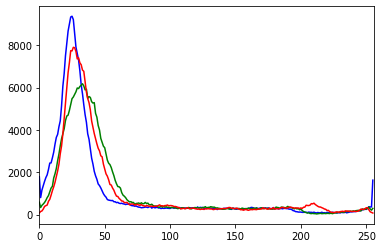

In [12]:
# Colour histogram 
colors = ('b','g','r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img_woman,mask],[i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

plt.show()



<h1>Thresholding/Binarizing Images</h1>
<li>Simple threshold</li>
<li>Inverse threshold</li>
<li>Adaptive Threshold</li>

In [3]:
gray = cv.cvtColor(img_woman, cv.COLOR_BGR2GRAY)
cv.imshow('Gray Image',gray)

cv.waitKey(0)

-1

In [4]:
# Simple threshold
threshold, thresh = cv.threshold(gray, 150,255,cv.THRESH_BINARY)
cv.imshow('THRESH', thresh)

cv.waitKey(0)

-1

In [15]:
# Inverse threshold
threshold, thresh_inv = cv.threshold(gray, 150,255,cv.THRESH_BINARY_INV)
cv.imshow('THRESH', thresh_inv)

cv.waitKey(0)

-1

In [5]:
# Adaptive Threshold
adaptive_thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV, 11,10)
cv.imshow('ADAPTIVE THRESHOLD', adaptive_thresh)

cv.waitKey(0)

-1

<h1>Gradients</h1>

<h1>METHODS OF EDGE DETECTION</h1>
<li>Laplacian</li>
<li>Sobel</li>
<li>Canny</li>

In [6]:
# Laplacian
laplacian = cv.Laplacian(gray, cv.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))
cv.imshow('LAPLACIAN',laplacian)


cv.waitKey(0)

-1

In [8]:
# Sobel
sobelX = cv.Sobel(gray, cv.CV_64F, 1,0)
sobelY = cv.Sobel(gray, cv.CV_64F, 0,1)
combined = cv.bitwise_or(sobelX,sobelY)

cv.imshow('sobelX',sobelX)
cv.imshow('sobelY',sobelY)
cv.imshow('combined',combined)


cv.waitKey(0)

-1

In [9]:
# Canny
canny = cv.Canny(gray, 50,255)
cv.imshow('Canny', canny)

cv.waitKey(0)

-1

<h1>--------------------------------------------------END-----------------------------------------------</h1>
<h1>--------------------------------------------------END-----------------------------------------------</h1>
<h1>--------------------------------------------------END-----------------------------------------------</h1>